In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
import xgboost

### Data Load

In [106]:
#Loading the CSV dataset into dataframe using pandas library

df_housing = pd.read_csv("Datasets/Bengaluru_House_Data.csv")

In [107]:
df_housing

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13118,Super built-up Area,Ready To Move,Electronic City,2 BHK,GMown E,1060,2.0,1.0,52.00
13119,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13120,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13121,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### Initiating Exploratory Data Analysis

In [5]:
# Checking shape of dataset

df_housing.shape

(13123, 9)

In [6]:
# Getting info of the dataset

df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13123 entries, 0 to 13122
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13123 non-null  object 
 1   availability  13123 non-null  object 
 2   location      13122 non-null  object 
 3   size          13107 non-null  object 
 4   society       7704 non-null   object 
 5   total_sqft    13123 non-null  object 
 6   bath          13051 non-null  float64
 7   balcony       12526 non-null  float64
 8   price         13123 non-null  float64
dtypes: float64(3), object(6)
memory usage: 922.8+ KB


In [7]:
# Checking number of columns in the dataset

df_housing.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
# Description of the dataset

df_description = df_housing.describe()

print(df_description)

               bath       balcony         price
count  13051.000000  12526.000000  13123.000000
mean       2.690905      1.583666    112.491768
std        1.338585      0.817563    146.423654
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   2912.000000


In [9]:
# Viewing the summary statistics in more readable format

df_description.T

,count,mean,std,min,25%,50%,75%,max
bath,13051.0,2.690905,1.338585,1.0,2.0,2.0,3.0,40.0
balcony,12526.0,1.583666,0.817563,0.0,1.0,2.0,2.0,3.0
price,13123.0,112.491768,146.423654,8.0,50.0,72.0,120.0,2912.0


In [10]:
# Checking for null values

df_housing.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13118,False,False,False,False,False,False,False,False,False
13119,False,False,False,False,True,False,False,True,False
13120,False,False,False,False,False,False,False,False,False
13121,False,False,False,False,False,False,False,False,False


In [11]:
# Checking for null values for each column(sum)

df_housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5419
total_sqft         0
bath              72
balcony          597
price              0
dtype: int64

In [12]:
# Checking how many types of Area_Type are present in data

df_housing['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [13]:
# Getting count of unique values in Area_Type column

df_housing['area_type'].value_counts()

Super built-up  Area    8654
Built-up  Area          2388
Plot  Area              1995
Carpet  Area              86
Name: area_type, dtype: int64

In [14]:
# Checking what kind of Availibility are present in data

df_housing['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [15]:
# Getting count of unique values in Availability column

df_housing['availability'].value_counts()

Ready To Move    10429
18-Dec             300
18-May             289
18-Apr             269
18-Aug             197
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [16]:
# Checking types of total_sqft are present in data

df_housing['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '2758', '1133 - 1384', '4689'],
      dtype=object)

In [17]:
# Getting count of unique values in Total_Sqft column

df_housing['total_sqft'].value_counts()

1200           833
1100           218
1500           200
2400           196
600            176
              ... 
2601             1
906              1
3450 - 3472      1
2384             1
4689             1
Name: total_sqft, Length: 2105, dtype: int64

In [18]:
# Checking the number of price are present in data

df_housing['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  71.58, 221.  , 488.  ])

In [19]:
# Getting count of unique values in Price column

df_housing['price'].value_counts()

75.00     308
65.00     296
55.00     272
60.00     266
45.00     238
         ... 
243.00      1
48.24       1
37.95       1
52.66       1
488.00      1
Name: price, Length: 1972, dtype: int64

In [20]:
# Getting count of unique values in Location column

df_housing['location'].value_counts()

Whitefield                        533
Sarjapur  Road                    390
Electronic City                   295
Kanakpura Road                    267
Thanisandra                       231
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1301, dtype: int64

In [21]:
# Getting count of unique values in size column

df_housing['size'].value_counts()

2 BHK         5126
3 BHK         4244
4 Bedroom      819
4 BHK          580
3 Bedroom      539
1 BHK          530
2 Bedroom      325
5 Bedroom      290
6 Bedroom      186
1 Bedroom      103
8 Bedroom       84
7 Bedroom       81
5 BHK           58
9 Bedroom       46
6 BHK           30
7 BHK           16
1 RK            13
10 Bedroom      11
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [22]:
# Getting count of unique values in Society column

df_housing['society'].value_counts()

GrrvaGr    77
PrarePa    74
Prtates    58
Sryalan    58
GMown E    54
           ..
Siilka      1
Tepleee     1
Soubya      1
Upoutks     1
SJovest     1
Name: society, Length: 2673, dtype: int64

In [23]:
# Getting count of unique values in Bath column

df_housing['bath'].value_counts()

2.0     6812
3.0     3231
4.0     1217
1.0      776
5.0      510
6.0      268
7.0      100
8.0       64
9.0       41
10.0      13
12.0       7
11.0       3
16.0       2
13.0       2
27.0       1
14.0       1
40.0       1
15.0       1
18.0       1
Name: bath, dtype: int64

In [24]:
# Getting count of unique values in Balcony column

df_housing['balcony'].value_counts()

2.0    5040
1.0    4822
3.0    1645
0.0    1019
Name: balcony, dtype: int64

### Data Visualization

<AxesSubplot:title={'center':'Area Type Pie Chart'}>

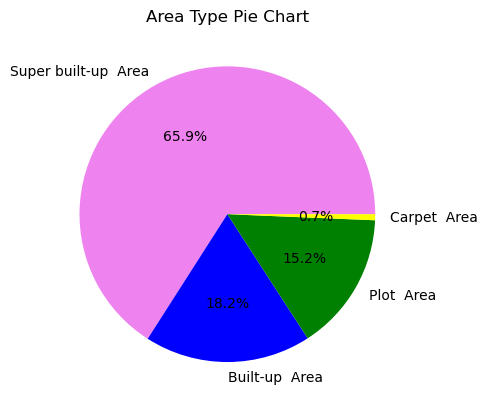

In [25]:
# Displaying detailed pie chart of area_type

df_housing.area_type.value_counts().plot(kind= 'pie', colors=['violet', 'blue', 'green', 'yellow'], 
                                         title = 'Area Type Pie Chart', ylabel = '',  autopct='%1.1f%%')
                                    

<AxesSubplot:title={'center':'Bath Bar Chart'}, xlabel='Number of Baths', ylabel='Counts'>

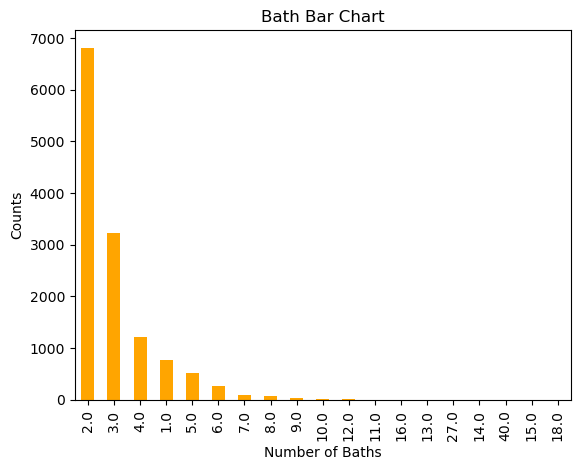

In [26]:
# Displaying detailed bar chart of Bath

df_housing.bath.value_counts().plot(kind= 'bar', color ='orange', title = 'Bath Bar Chart', 
                                   xlabel = 'Number of Baths' , ylabel = 'Counts')
                                        

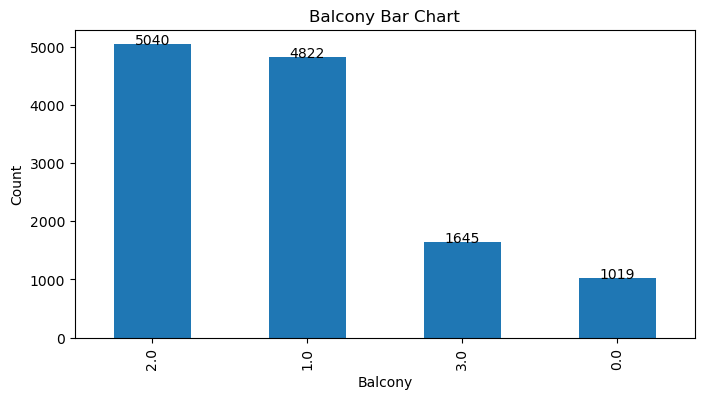

In [27]:
## Displaying bar chart of Balcony

# Getting count of unique values in Balcony column
Balcony_Counts = df_housing['balcony'].value_counts()

# Creating a bar plot of the Baclony counts
Balcony_Plot = Balcony_Counts.plot(kind = 'bar', figsize = (8,4))

# Adding text annotations to each bar
for i,count in enumerate(Balcony_Counts):
    Balcony_Plot.text(i, count+1, count, ha = 'center', fontsize = 10)
    
# Set the title and labels
Balcony_Plot.set_title('Balcony Bar Chart')
Balcony_Plot.set_xlabel('Balcony')
Balcony_Plot.set_ylabel('Count')

plt.show()

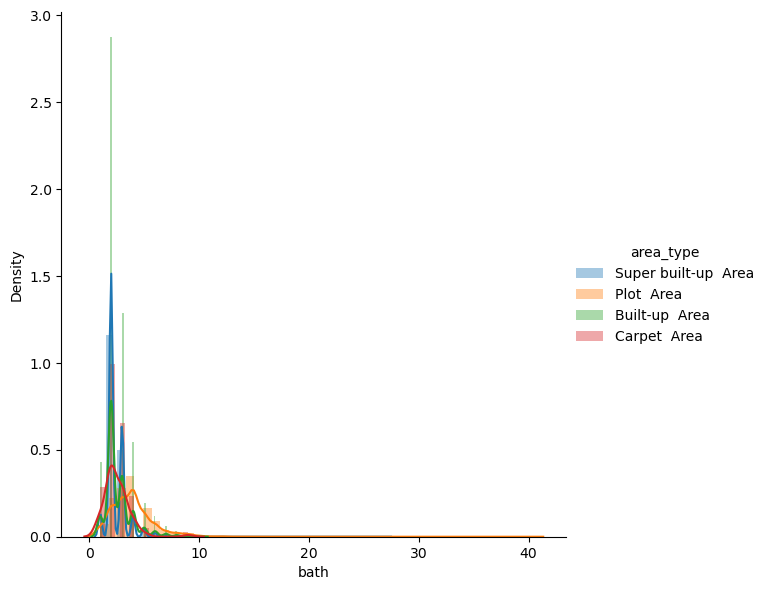

In [28]:
import warnings
warnings.filterwarnings('ignore')

# Creating a grid density plot of the Bath variable and it is color coded based on the each area type
sns.FacetGrid(data=df_housing, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

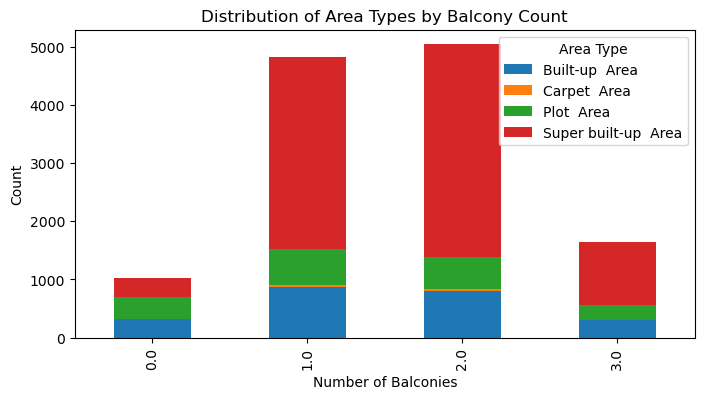

In [29]:
# Calculating the counts of properties with each balcony count and area type
counts = df_housing.groupby(['balcony', 'area_type'])['area_type'].count().unstack()

# Creating the stacked bar chart
stacked_chart = counts.plot(kind='bar', stacked=True, figsize=(8,4))

# Set the axis labels and title
stacked_chart.set_xlabel('Number of Balconies')
stacked_chart.set_ylabel('Count')
stacked_chart.set_title('Distribution of Area Types by Balcony Count')

# Adding a legend
stacked_chart.legend(title='Area Type')

# Show the plot
plt.show()


('Numeric Features -', Index(['bath', 'balcony', 'price'], dtype='object')) 

('Categorical Features -', Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')) 

price      1.00000
bath       0.45226
balcony    0.12221
Name: price, dtype: float64 



<AxesSubplot:title={'center':'Correlation of numeric features with price'}>

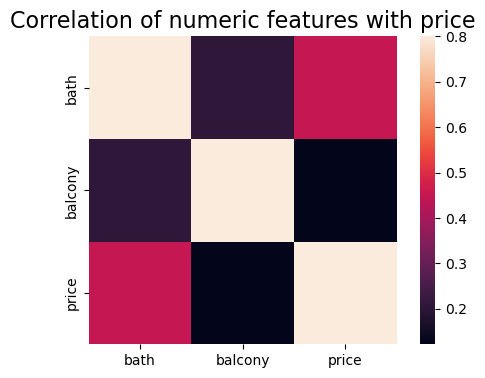

In [30]:
##Visualizing relation between price and other features

#Selecting only numeric features from the dataframe
Housing_Numeric_Features = df_housing.select_dtypes(include = [np.number])
print(('Numeric Features -', Housing_Numeric_Features.columns), '\n')

#Selecting only categorical features from the dataframe
Housing_Categorical_Features = df_housing.select_dtypes(include = [np.object])
print(('Categorical Features -', Housing_Categorical_Features.columns), '\n')

#Creating a correlation matrix between numeric features
Correlation_Var = Housing_Numeric_Features.corr()

#Sorting the correlation matrix with respect to 'price' feature
print(Correlation_Var['price'].sort_values(ascending = False), '\n')

#Creating a heatmap to visualize the correlation matrix
f,ax = plt.subplots(figsize = (6,4))
plt.title('Correlation of numeric features with price', y =1, size = 16)
sns.heatmap(Correlation_Var, square = True, vmax = 0.8)

In [31]:
# Dropping some less important features
df_housing = df_housing.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')

In [32]:
# Displaying new data
df_housing.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [33]:
df_housing.shape

(13123, 5)

In [34]:
# checking for null values
df_housing.isnull().sum()

location       1
size          16
total_sqft     0
bath          72
price          0
dtype: int64

In [35]:
df_housing = df_housing.dropna()

In [36]:
# checking for null values
df_housing.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [37]:
# Check for duplicates in the DataFrame
duplicates = df_housing.duplicated()

# Print the total number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 852


In [38]:
df_housing.drop_duplicates(inplace=True)

In [39]:
# Check for duplicates in the DataFrame
duplicates = df_housing.duplicated()

# Print the total number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


### Feature Engineering

In [40]:
# Checking unique values of Size column
df_housing["size"].unique()  

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [41]:
# New column BHK is created from size column
df_housing['Bhk'] = df_housing['size'].apply(lambda x: int(x.split(" ")[0]))

In [42]:
df_housing.head()

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


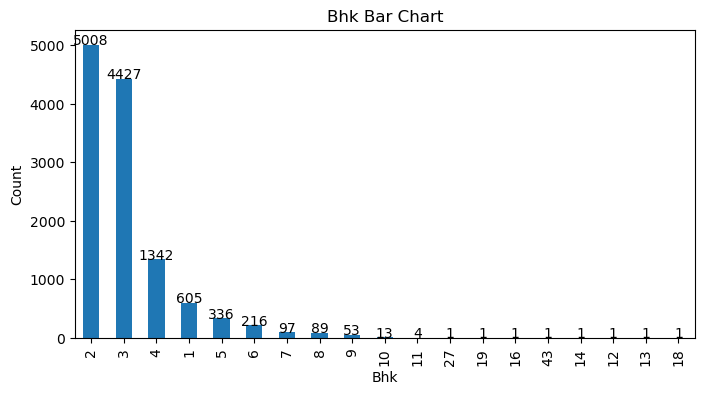

In [43]:
## Displaying bar chart of BHK

# Getting count of unique values in Balcony column
Bhk_Counts = df_housing['Bhk'].value_counts()

# Creating a bar plot of the Bhk counts
Bhk_Plot = Bhk_Counts.plot(kind = 'bar', figsize = (8,4))

# Adding text annotations to each bar
for i,count in enumerate(Bhk_Counts):
    Bhk_Plot.text(i, count+1, count, ha = 'center', fontsize = 10)
    
# Set the title and labels
Bhk_Plot.set_title('Bhk Bar Chart')
Bhk_Plot.set_xlabel('Bhk')
Bhk_Plot.set_ylabel('Count')

plt.show()

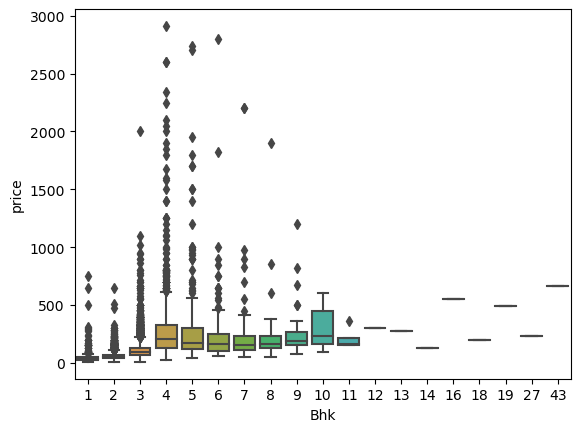

In [44]:
# Boxplot showing relationship between Bhk and Price 
sns.boxplot(x='Bhk', y='price', data = df_housing)
plt.show()

In [45]:
# Checking total Sqft feature
df_housing.total_sqft.unique()

array(['1056', '2600', '1440', ..., '2758', '1133 - 1384', '4689'],
      dtype=object)

In [46]:
# Function to check and convert into float value

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [47]:
# Filtering out those values which can't be converted into float
df_housing[~df_housing["total_sqft"].apply(is_float)].head(5)

,location,size,total_sqft,bath,price,Bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [48]:
# converting 2100 - 2850 kind of values to sqft number

def convert_totalsqft_to_number(x):
    try:
        return float(x)
    except:
        tokens = x.split("-")
        if len(tokens) == 2:
            return (float(tokens[0])+float(tokens[1]))/2
        else:
            return None


In [49]:
#new data frame df_housing created from original dataframe and total_sqft value adjusted
df_housing = df_housing.copy()
df_housing["total_sqft"] = df_housing["total_sqft"].apply(convert_totalsqft_to_number)
df_housing.head(10)

,location,size,total_sqft,bath,price,Bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [50]:
# Adding price per square feet column to make data sensable
df_housing = df_housing.copy()
df_housing["price_per_sqft"] = df_housing["price"]*100000/df_housing["total_sqft"]
df_housing.head()

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [51]:
# Use dimensionality reduction on location to reduce number of location
df_housing['location'] = df_housing['location'].str.strip()
Location_Count = df_housing.groupby('location')['location'].count().sort_values(ascending=False)
Location_Count

location
Whitefield               498
Sarjapur  Road           351
Electronic City          268
Thanisandra              223
Kanakpura Road           212
                        ... 
Kanakapura Main Road       1
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1290, dtype: int64

In [52]:
# Identifying location whose count are less than equal to 10
New_Location_Count = Location_Count[Location_Count<=10]
New_Location_Count

location
Marsur                   10
Pattandur Agrahara       10
Dodsworth Layout         10
Ganga Nagar              10
Sadashiva Nagar          10
                         ..
Kanakapura Main Road      1
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
whitefiled                1
Name: location, Length: 1061, dtype: int64

In [53]:
df_housing.location = df_housing.location.apply(lambda x: 'other' if x in New_Location_Count else x)
len(df_housing.location.unique()) 

230

In [54]:
df_housing.head()

,location,size,total_sqft,bath,price,Bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Outliers removal from business perspective

In [55]:
# Fetching shape from dataframe (excluding outlier based on threshold per Bhk to be 300 sqft)

df_housing = df_housing[~(df_housing.total_sqft/df_housing.Bhk<300)]

df_housing.shape

(11483, 7)

In [56]:
# Checking price per sqft to check any outlier, min and max value isn't that extreme. 
df_housing.price_per_sqft.describe()


count     11438.000000
mean       6397.899913
std        4246.568993
min         267.829813
25%        4255.319149
50%        5349.687035
75%        7000.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [57]:
# Define a function to remove outliers per location using mean and one standard deviation
def remove_outliers(df):
    # Group the data by location
    grouped = df.groupby("location")
    
    # Initialize an empty dataframe to store the filtered data
    filtered_df = pd.DataFrame()
    
    # Iterate over each group and remove outliers based on mean and one standard deviation
    for name, group in grouped:
        mean = np.mean(group.price_per_sqft)
        std = np.std(group.price_per_sqft)
        filtered_group = group[(group.price_per_sqft > (mean - std)) & (group.price_per_sqft <= (mean + std))]
        filtered_df = pd.concat([filtered_df, filtered_group], ignore_index=True)
        
    return filtered_df

# Remove outliers using the remove_outliers function
df_housing = remove_outliers(df_housing)

# Print the number of rows in the original and filtered dataframes
print("Original dataset size: ", df_housing.shape[0])

Original dataset size:  9403


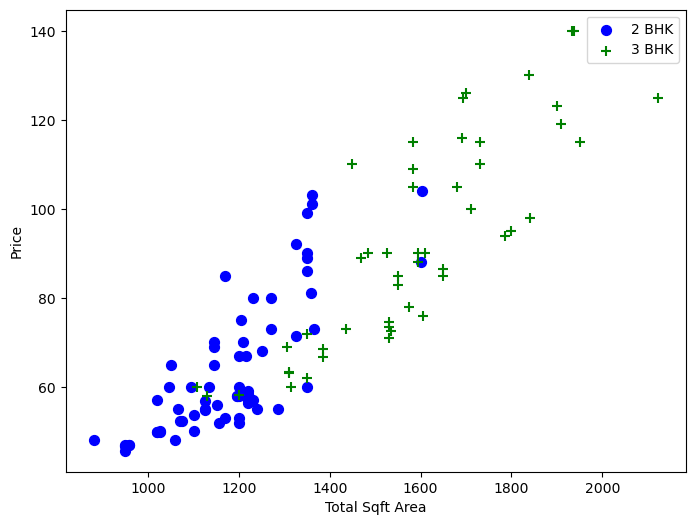

In [58]:
# Scatter chart of 2-3 Bhk property
def Bhk_Scatter_Plot(df,location):
    bhk2 = df[(df_housing.location==location) & (df_housing.Bhk==2)]
    bhk3 = df[(df_housing.location==location) & (df_housing.Bhk==3)]
    plt.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Sqft Area")
    plt.ylabel("Price")
    plt.legend()

Bhk_Scatter_Plot(df_housing,"Marathahalli")


#### In the above chart, price of 3 bedroom apartment is less than 2 bedroom apartment although they have same sqft area. Now, for a given location, dictionary of stats per bhk will be built, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}


In [59]:
# Function to remove outliers based on number of bhk
def bhk_outliers_removal(df):
    """
    Removes outliers based on number of bedrooms for each location.
    """
    # create an empty array to store the indices of outliers to be excluded
    exclude_indices = np.array([])
    # iterate over each location in the dataset
    for location, location_df in df_housing.groupby('location'):
        # create an empty dictionary to store statistics for each bhk
        bhk_stats = {}
        # iterate over each bhk in the current location's dataset
        for bhk, bhk_df in location_df.groupby('Bhk'):
            # calculate the mean, standard deviation, and count of prices per square foot for the current bhk
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        # iterate over each bhk in the current location's dataset again
        for bhk, bhk_df in location_df.groupby('Bhk'):
            # check if there is a lower bhk in the same location with a count of at least 5
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                # add the indices of outliers to be excluded to the exclude_indices array
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

# Remove outliers from the dataset
df_housing = bhk_outliers_removal(df_housing)
print(f"Shape of dataset after removing bedroom outliers: {df_housing.shape}")


Shape of dataset after removing bedroom outliers: (6693, 7)


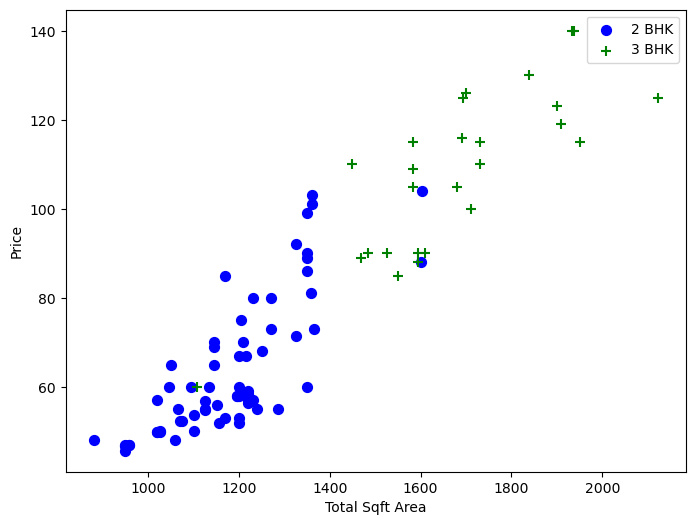

In [60]:
Bhk_Scatter_Plot(df_housing,"Marathahalli")

### Removing outliers based on bathroom feature

Text(0, 0.5, 'Count')

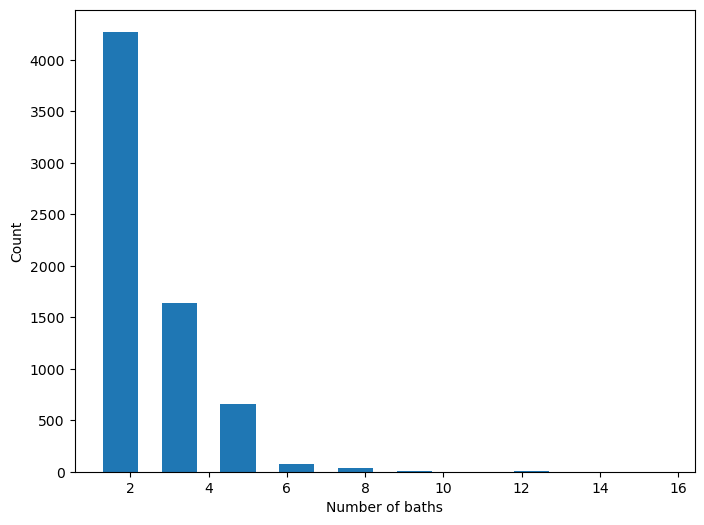

In [61]:
# Visualizing distribution of Bath feature
plt.hist(df_housing.bath,rwidth=0.6)
plt.xlabel("Number of baths")
plt.ylabel("Count")

In [62]:
#checking number of bhk
df_housing.Bhk.describe()

count    6693.000000
mean        2.519349
std         0.952138
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Bhk, dtype: float64

In [63]:
# checking numbers of baths

df_housing.bath.describe()

count    6693.000000
mean        2.473032
std         1.044896
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: bath, dtype: float64

In [64]:
# it's not possible to have more number if bathrooms than bedrooms. Excluding baths based on that logic. 

df_housing = df_housing.drop(df_housing[df_housing.bath > df_housing.Bhk + 2].index)


In [65]:
df_housing.shape

(6689, 7)

In [66]:
# Dropping extra feature

df_housing= df_housing.drop(['size'],axis='columns')
df_housing.head()

,location,total_sqft,bath,price,Bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


### Using One hot encoding for location feature

In [67]:
Dummy = pd.get_dummies(df_housing.location)
Dummy.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Concatinating both df together

df_housing = pd.concat([df_housing, Dummy.drop('other',axis='columns')], axis='columns')
df_housing.head()


,location,total_sqft,bath,price,Bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Dropping location feature as this has no use now

df_housing= df_housing.drop('location',axis='columns')
df_housing.head()

,total_sqft,bath,price,Bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_housing.shape

(6689, 234)

In [71]:
# Check for NaN values in the DataFrame
print(df_housing.isna().sum())


total_sqft            0
bath                  0
price                 0
Bhk                   0
price_per_sqft        0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 234, dtype: int64


In [72]:
# Remove rows with NaN values
df_housing = df_housing.dropna()
print('Final Dataset after removing all Nan values -', df_housing.isna().sum())
print('Shape of the dataset - ', df_housing.shape)

Final Dataset after removing all Nan values - total_sqft            0
bath                  0
price                 0
Bhk                   0
price_per_sqft        0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 234, dtype: int64
Shape of the dataset -  (6689, 234)


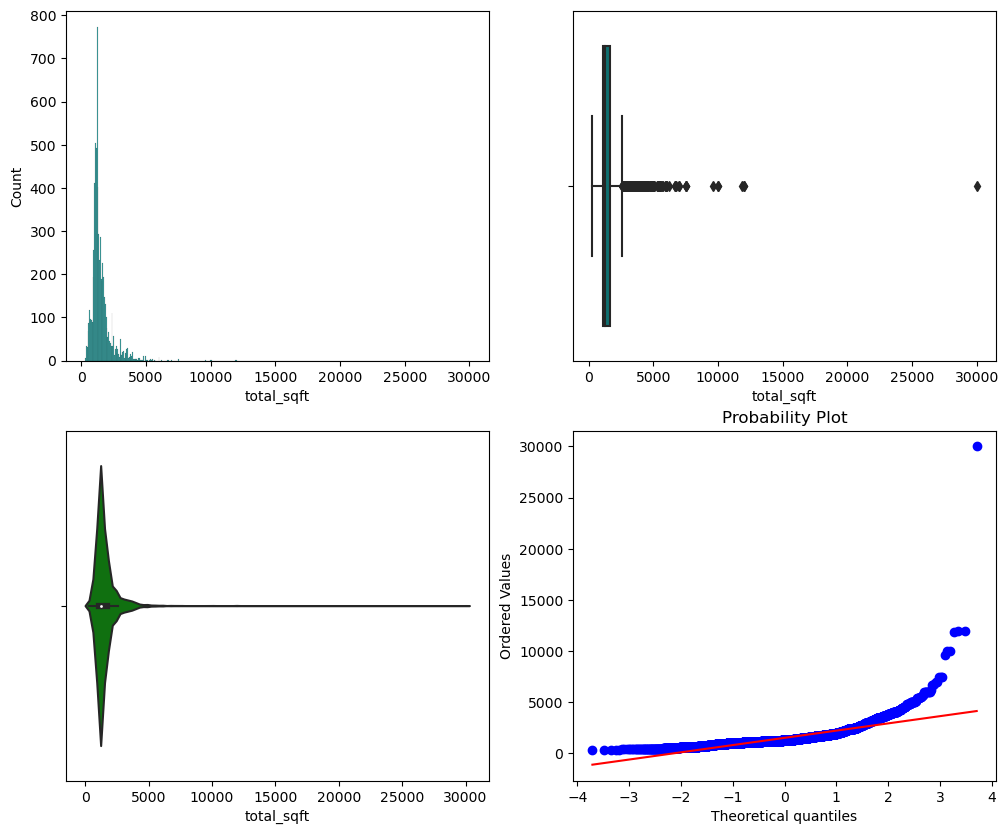

In [73]:
# Exploring Numerical variable total_sqft

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Create a histogram of the 'total_sqft' column
ax1 = sns.histplot(x=df_housing['total_sqft'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'total_sqft' column
ax2 = sns.boxplot(x=df_housing['total_sqft'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'total_sqft' column
ax3 = sns.violinplot(x=df_housing['total_sqft'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'total_sqft' column
ax4 = probplot(df_housing['total_sqft'], plot=plt)

# Show the plots
plt.show()

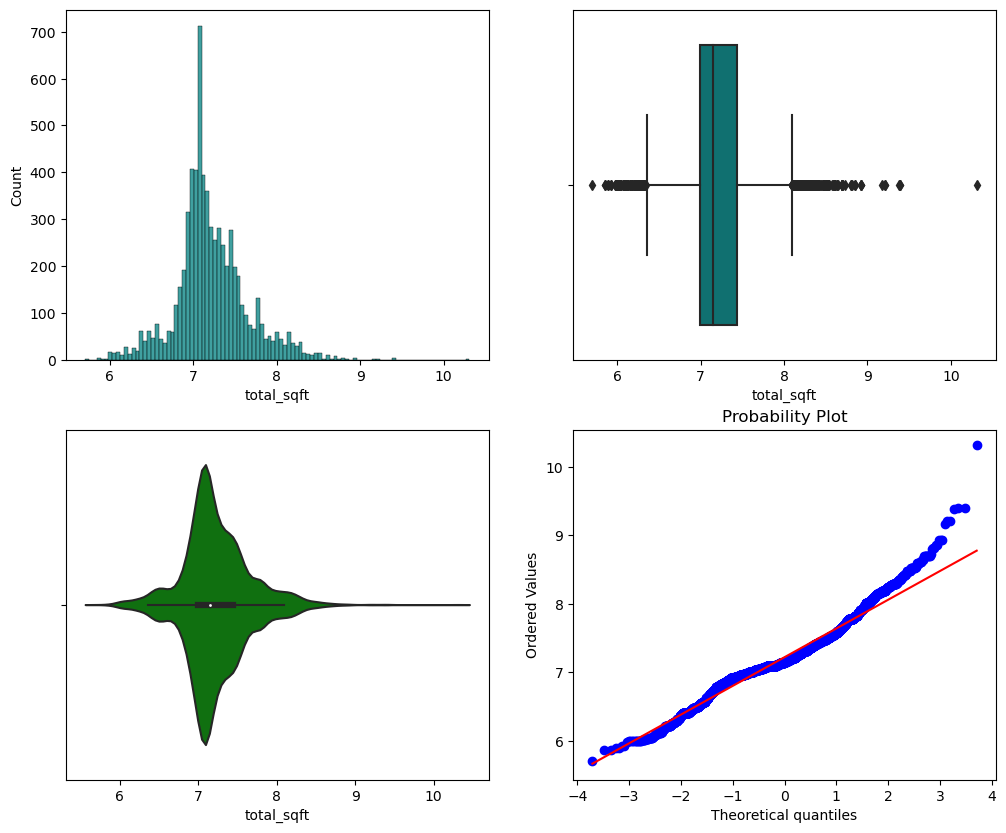

In [74]:
# Log Transform

# Log transform the 'total_sqft' column
df_housing['total_sqft'] = np.log(df_housing['total_sqft'])

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Create a histogram of the 'total_sqft' column
ax1 = sns.histplot(x=df_housing['total_sqft'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'total_sqft' column
ax2 = sns.boxplot(x=df_housing['total_sqft'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'total_sqft' column
ax3 = sns.violinplot(x=df_housing['total_sqft'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'total_sqft' column
ax4 = probplot(df_housing['total_sqft'], plot=plt)

# Show the plots
plt.show()

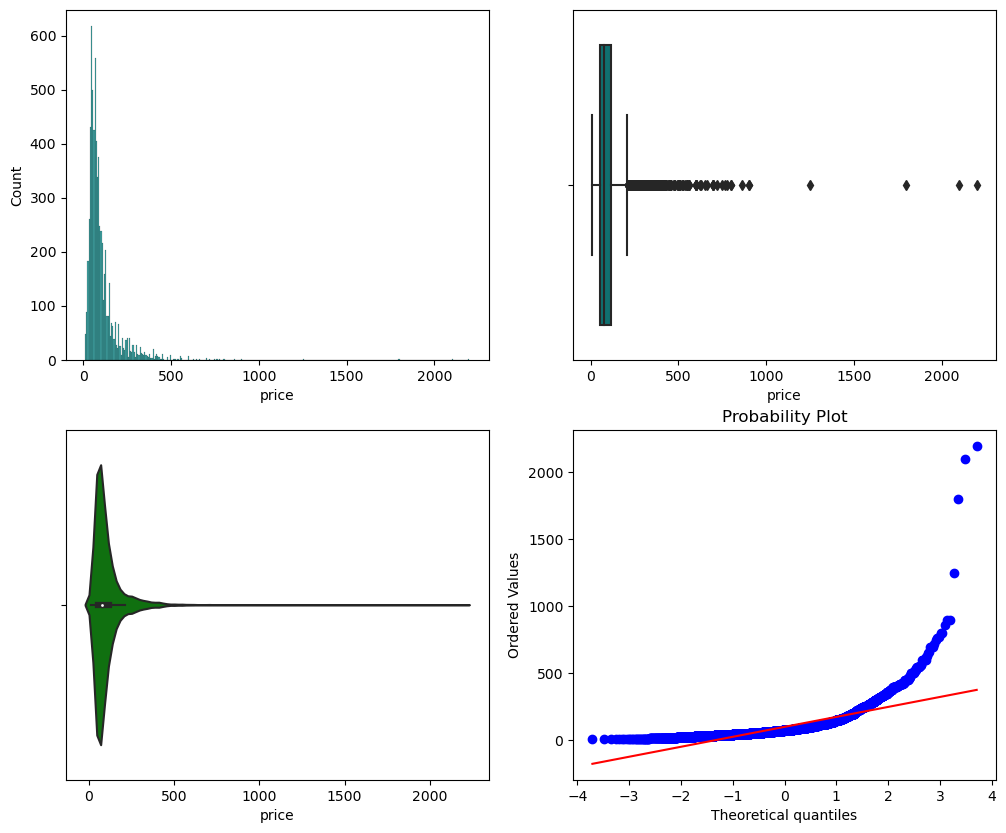

In [75]:
# Exploring Numerical variable price

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Create a histogram of the 'price' column
ax1 = sns.histplot(x=df_housing['price'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'price' column
ax2 = sns.boxplot(x=df_housing['price'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'price' column
ax3 = sns.violinplot(x=df_housing['price'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'price' column
ax4 = probplot(df_housing['price'], plot=plt)

# Show the plots
plt.show()

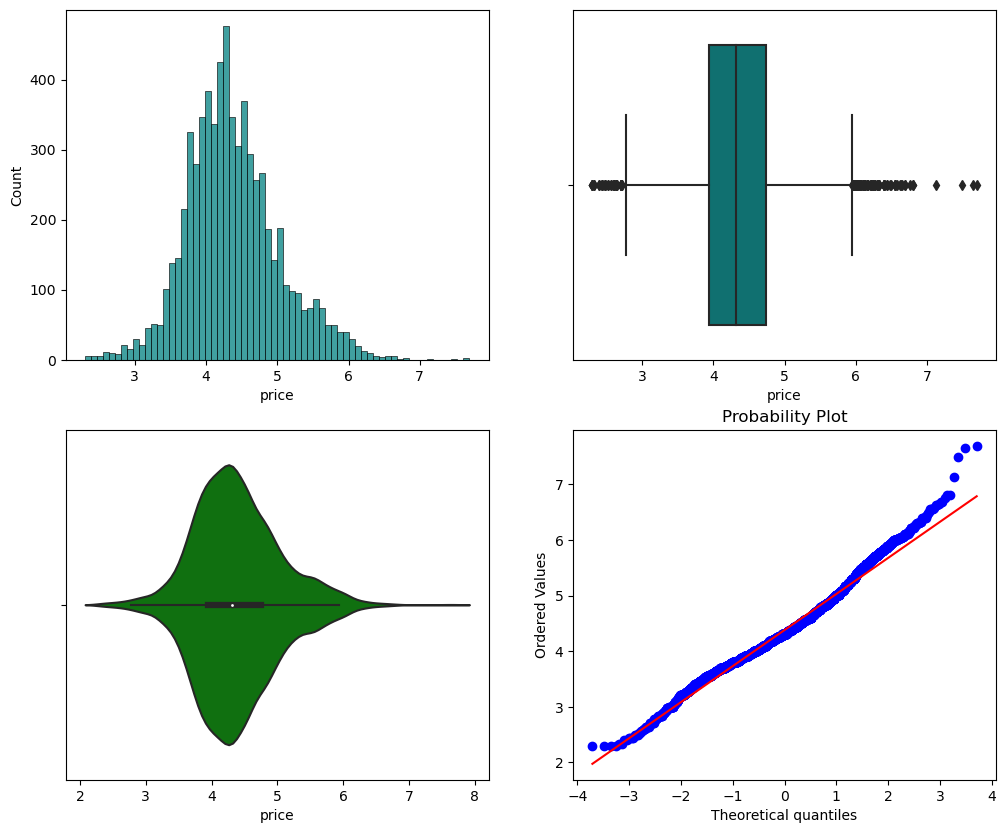

In [76]:
# Log Transform

# Log transform the 'total_sqft' column
df_housing['price'] = np.log(df_housing['price'])

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Create a histogram of the 'price' column
ax1 = sns.histplot(x=df_housing['price'], color='teal', ax=ax[0, 0])

# Create a boxplot of the 'price' column
ax2 = sns.boxplot(x=df_housing['price'], ax=ax[0, 1], color='teal')

# Create a violinplot of the 'price' column
ax3 = sns.violinplot(x=df_housing['price'], ax=ax[1, 0], color='green')

# Create a probability plot of the 'price' column
ax4 = probplot(df_housing['price'], plot=plt)

# Show the plots
plt.show()

In [77]:
# Droping price_per_sqft feature
df_housing = df_housing.drop(['price_per_sqft'], axis = 'columns')
df_housing.head()

,total_sqft,bath,price,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,7.955074,4.0,6.059123,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.396335,3.0,5.267858,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.536364,2.0,5.459586,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.090077,2.0,4.867534,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.118826,2.0,4.997212,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the dataframe into training and testing datasets

In [78]:
# Defining input features

X = df_housing.drop(['price'], axis= 'columns')
X.head()

,total_sqft,bath,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,7.955074,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.396335,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.536364,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.090077,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.118826,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Defining target variable

Y = df_housing.price
Y.head(10)

0     6.059123
1     5.267858
2     5.459586
3     4.867534
4     4.997212
5     6.023448
6     5.908083
8     5.117994
9     4.442651
10    5.347108
Name: price, dtype: float64

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [81]:
# Select columns to be scaled
cols_to_scale = ['total_sqft','Bhk', 'bath']

# Perform scaling
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [82]:
X_train.head()

,total_sqft,bath,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9249,1.013528,0.519788,0.508145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4031,0.315128,0.519788,0.508145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7014,-0.184086,-0.449792,-0.541782,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
220,-0.714227,-0.449792,-0.541782,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5905,-0.885998,-0.449792,-0.541782,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X_test.shape

(2007, 232)

In [84]:
X_train.shape

(4682, 232)

## Decision Tree from Sklearn library

In [85]:
from sklearn.tree import DecisionTreeRegressor

# Set the hyperparameters for the DecisionTreeRegressor
dt_params = {'criterion': 'mse', 'splitter': 'best'}

# Train Decision Tree model
dt_clf = DecisionTreeRegressor(**dt_params, random_state=42)
dt_clf.fit(X_train, Y_train)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
dt_score = dt_clf.score(X_test, Y_test)
print(f"Decision Tree R-squared score on test data: {dt_score}")

# Compute the predicted target values for the test dataset using the trained decision tree model
Y_pred = dt_clf.predict(X_test)

# Compute the mean squared error (MSE) of the model predictions
mse = mean_squared_error(Y_test, Y_pred)

# Compute the root mean squared error (RMSE) of the model predictions
rmse = np.sqrt(mse)

# Compute the mean absolute error (MAE) of the model predictions
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"Decision Tree MSE on test data: {mse:.2f}")
print(f"Decision Tree RMSE on test data: {rmse:.2f}")
print(f"Decision Tree MAE on test data: {mae:.2f}")


Decision Tree R-squared score on test data: 0.7620414174211332
Decision Tree MSE on test data: 0.10
Decision Tree RMSE on test data: 0.32
Decision Tree MAE on test data: 0.22


## K-Fold Cross Validation

In [87]:
# Create the decision tree model
dt = DecisionTreeRegressor(**dt_params)

# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Evaluate the decision tree model using cross-validation
scores = cross_val_score(dt, X, Y, cv=cv)

# Print the cross-validation scores
print("Decision Tree Cross-Validation Scores:", scores)
print("Mean R-squared:", scores.mean())

Decision Tree Cross-Validation Scores: [0.77638921 0.76008184 0.79727237 0.7989907  0.78373328]
Mean R-squared: 0.7832934787330762


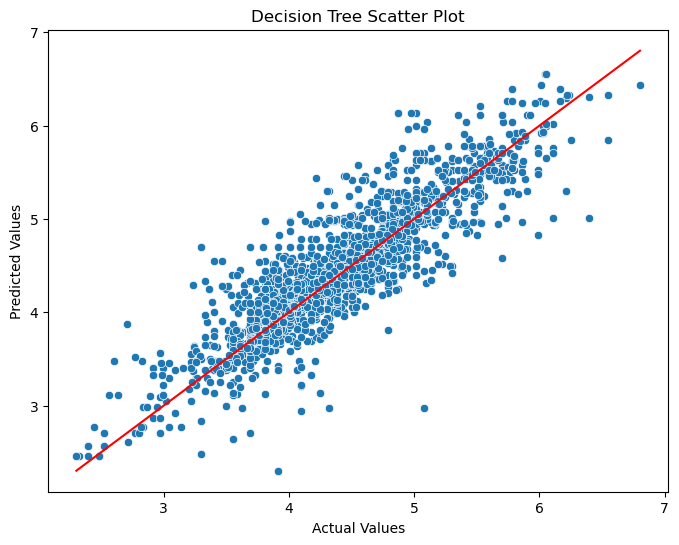

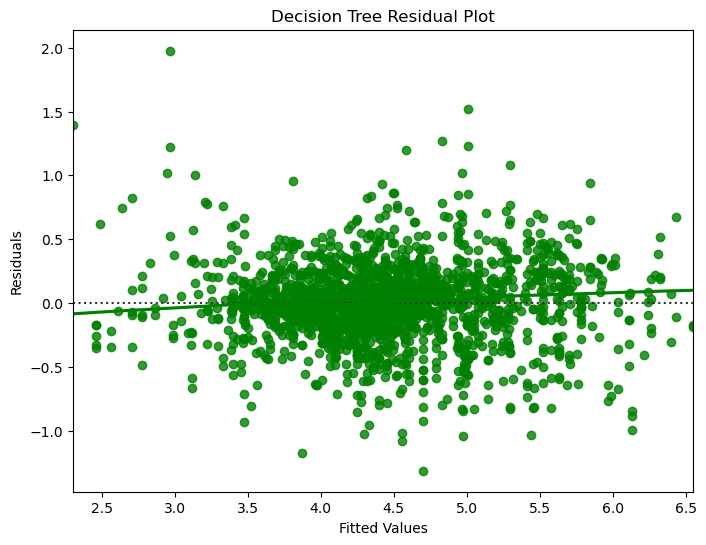

In [88]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('Decision Tree Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('Decision Tree Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


Note that the scatter plots show how well the predicted values match the actual values, while the residual plots show the difference between the actual and predicted values (i.e., the residuals) versus the actual values. 

## Decision Tree from XGBoost library

In [90]:
# Set the hyperparameters for the XGBoost decision tree
xgb_params = {'booster': 'gbtree','objective': 'reg:squarederror', 'random_state': 42}

# Train XGBoost decision tree model
xgb_clf = XGBRegressor(**xgb_params)
xgb_clf.fit(X_train, Y_train)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
xgb_score = xgb_clf.score(X_test, Y_test)
print(f"XGBoost Decision Tree R-squared score on test data: {xgb_score}")

# Compute the predicted target values for the test dataset using the trained XGBoost decision tree model
Y_pred = xgb_clf.predict(X_test)

# Compute the mean squared error (MSE) of the model predictions
mse = mean_squared_error(Y_test, Y_pred)

# Compute the root mean squared error (RMSE) of the model predictions
rmse = np.sqrt(mse)

# Compute the mean absolute error (MAE) of the model predictions
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"XGBoost Decision Tree MSE on test data: {mse:.2f}")
print(f"XGBoost Decision Tree RMSE on test data: {rmse:.2f}")
print(f"XGBoost Decision Tree MAE on test data: {mae:.2f}")


XGBoost Decision Tree R-squared score on test data: 0.8926010046566053
XGBoost Decision Tree MSE on test data: 0.05
XGBoost Decision Tree RMSE on test data: 0.21
XGBoost Decision Tree MAE on test data: 0.16


## K-fold cross validation

In [94]:
# Define the cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Train and evaluate the XGBoost Decision Tree model using cross-validation
score = cross_val_score(xgb_clf, X, Y, cv=cv, scoring='r2')

# Print the cross-validation scores
print("XGBoost Decision Tree Cross-Validation Scores:", score)
print("Mean R-squared:", score.mean())

XGBoost Decision Tree Cross-Validation Scores: [0.8858715  0.8750951  0.8865578  0.8846079  0.89743973]
Mean R-squared: 0.8859144060444463


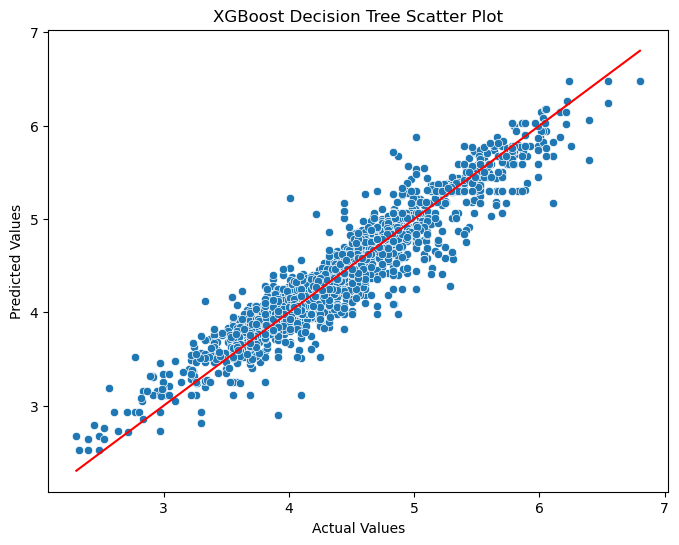

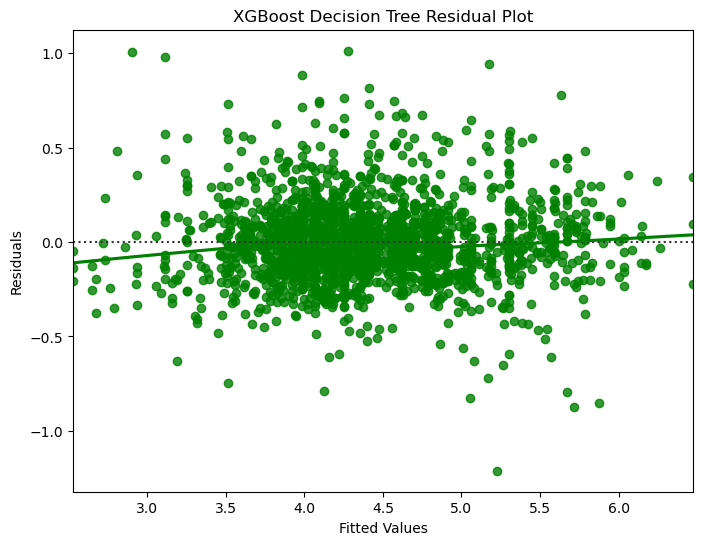

In [95]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('XGBoost Decision Tree Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('XGBoost Decision Tree Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Random Forest from XGBoost library

In [96]:
import xgboost as xgb

# Set the hyperparameters for the XGBoost random forest
xgb_params = {'objective': 'reg:squarederror', 'random_state': 42}

# Train XGBoost random forest model
xgb_rf_clf = xgb.XGBRFRegressor(**xgb_params)
xgb_rf_clf.fit(X_train, Y_train)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
xgb_rf_score = xgb_rf_clf.score(X_test, Y_test)
print(f"XGBoost Random Forest R-squared score on test data: {xgb_rf_score}")

# Compute the predicted target values for the test dataset using the trained XGBoost random forest model
Y_pred = xgb_rf_clf.predict(X_test)

# Compute the mean squared error (MSE) of the model predictions
mse = mean_squared_error(Y_test, Y_pred)

# Compute the root mean squared error (RMSE) of the model predictions
rmse = np.sqrt(mse)

# Compute the mean absolute error (MAE) of the model predictions
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"XGBoost Random Forest MSE on test data: {mse:.2f}")
print(f"XGBoost Random Forest RMSE on test data: {rmse:.2f}")
print(f"XGBoost Random Forest MAE on test data: {mae:.2f}")

XGBoost Random Forest R-squared score on test data: 0.8193966281638057
XGBoost Random Forest MSE on test data: 0.08
XGBoost Random Forest RMSE on test data: 0.28
XGBoost Random Forest MAE on test data: 0.21


## Using K-fold cross validation

In [97]:
# Define the cross-validation iterator
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Train and evaluate the XGBoost random forest model using cross-validation
xgb_rf_cv = xgb.XGBRFRegressor(**xgb_params)
cv_score = cross_val_score(xgb_rf_cv, X, Y, cv=cv, scoring='r2')

# Print the cross-validation scores
print("XGBoost Random Forest Cross-Validation Scores:", cv_score)
print("Mean R-squared:", cv_score.mean())

XGBoost Random Forest Cross-Validation Scores: [0.80810227 0.80208256 0.8181131  0.80805847 0.82762849]
Mean R-squared: 0.8127969781543835


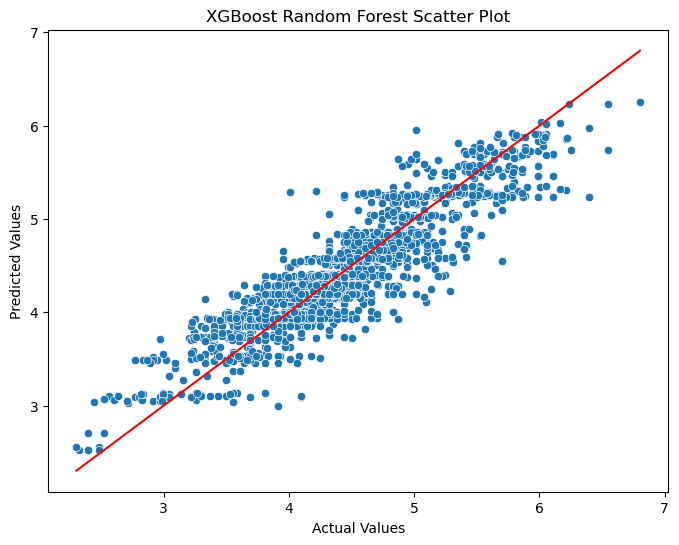

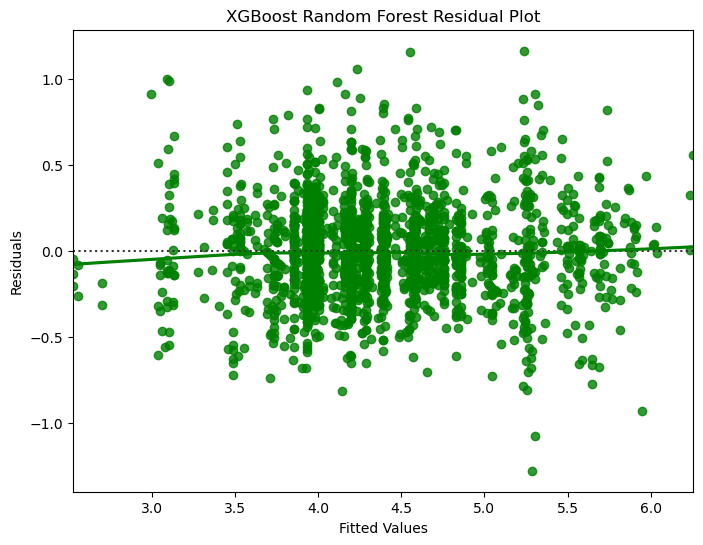

In [98]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('XGBoost Random Forest Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('XGBoost Random Forest Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# XGBoost from XGBoost library

In [99]:
# Set the hyperparameters for the XGBoost model
xgb_params = {'objective': 'reg:squarederror', 'random_state': 42}

# Train XGBoost model
xgb_clf = xgb.XGBRegressor(**xgb_params)

# Computes the coefficient of determination (R-squared) score of the trained model on the test dataset
xgb_clf.fit(X_train, Y_train)

# Compute the predicted target values for the test dataset using the trained XGBoost model
xgb_score = xgb_clf.score(X_test, Y_test)

print(f"XGBoost R-squared score on test data: {xgb_score}")
Y_pred = xgb_clf.predict(X_test)

# Compute the mean squared error (MSE), RMSE, MAE of the model predictions
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

# Print the computed error metrics
print(f"XGBoost MSE on test data: {mse:.2f}")
print(f"XGBoost RMSE on test data: {rmse:.2f}")
print(f"XGBoost MAE on test data: {mae:.2f}")

XGBoost R-squared score on test data: 0.8926010046566053
XGBoost MSE on test data: 0.05
XGBoost RMSE on test data: 0.21
XGBoost MAE on test data: 0.16


## K-fold cross validation 

In [100]:
# Define the cross-validation iterator
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Train and evaluate the XGBoost model using cross-validation
score = cross_val_score(xgb_clf, X, Y, cv=cv, scoring='r2')

# Print the cross-validation scores
print("XGBoost Cross-Validation Scores:", score)
print("Mean R-squared:", score.mean())

XGBoost Cross-Validation Scores: [0.8858715  0.8750951  0.8865578  0.8846079  0.89743973]
Mean R-squared: 0.8859144060444463


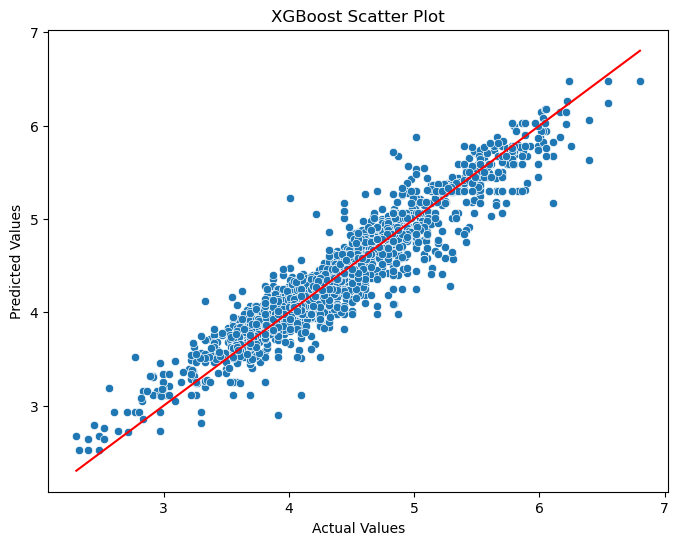

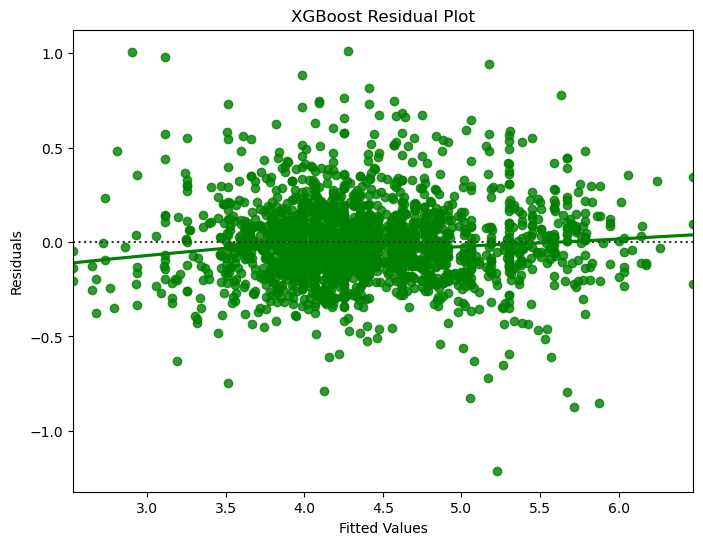

In [101]:
# Create scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
sns.lineplot(x=Y_test, y=Y_test, color='red')
plt.title('XGBoost Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Create residual plot
sns.residplot(x=Y_pred, y=Y_test, lowess=True, color="g")
plt.title('XGBoost Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [102]:
# RandomsearchCV is used for 2 different techniques 
def find_best_model_using_randomsearchcv(X, Y):
    algos = {
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150, 200],
                'max_features': ['sqrt', 'log2'],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.05, 0.1, 0.15, 0.2],
                'max_depth': [3, 4, 5, 6],
                'n_estimators': [50, 100, 150, 200],
                'objective': ['reg:squarederror']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, n_iter=5, random_state=0, return_train_score=False)
        rs.fit(X,Y)
        mean_test_score = np.mean(rs.cv_results_['mean_test_score'])
        print(f"{algo_name} Mean Cross-Validation Score: {mean_test_score:.2f}")
        Y_pred = rs.predict(X)
        r_squared = rs.best_score_
        mse = mean_squared_error(Y, Y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(Y, Y_pred)
        #print(f"{algo_name} Cross-Validation Score: {r_squared:.2f}")
        print(f"{algo_name} Cross-Validation Scores: {rs.cv_results_['mean_test_score']}")
        scores.append({
            'model': algo_name,
            'best_score': r_squared,
            'best_params': rs.best_params_,
            'mse': mse,
            'rmse': rmse,
            'mae': mae
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'mse', 'rmse', 'mae'])

    
find_best_model_using_randomsearchcv(X, Y)


random_forest Mean Cross-Validation Score: 0.72
random_forest Cross-Validation Scores: [0.53969391 0.79620274 0.7972261  0.72794627 0.7523073 ]
xgboost Mean Cross-Validation Score: 0.87
xgboost Cross-Validation Scores: [0.8697647  0.85974775 0.88222853 0.87623886 0.86270797]


,model,best_score,best_params,mse,rmse,mae
0,random_forest,0.797226,"{'n_estimators': 50, 'min_samples_split': 10, ...",0.076989,0.277468,0.210730
1,xgboost,0.882229,"{'objective': 'reg:squarederror', 'n_estimator...",0.038303,0.195713,0.146061


random_forest Mean Cross-Validation Score: 0.72
random_forest Cross-Validation Scores: [0.54962411 0.79334792 0.79548424 0.72662528 0.7536562 ]
xgboost Mean Cross-Validation Score: 0.87
xgboost Cross-Validation Scores: [0.8697647  0.85974775 0.88222853 0.87623886 0.86270797]


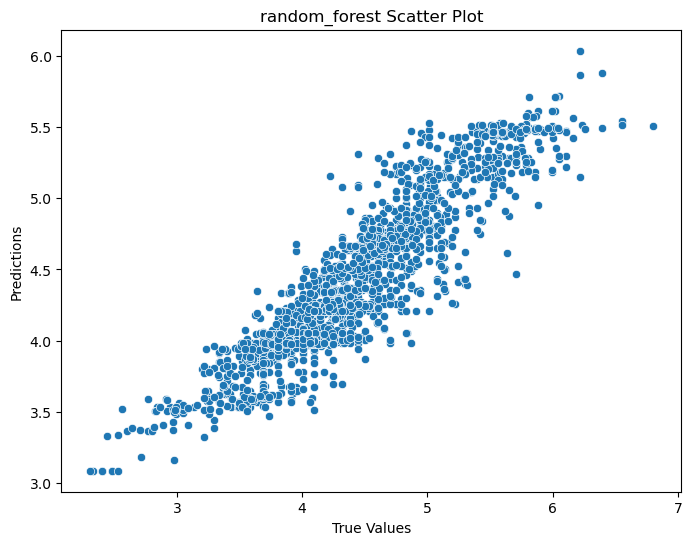

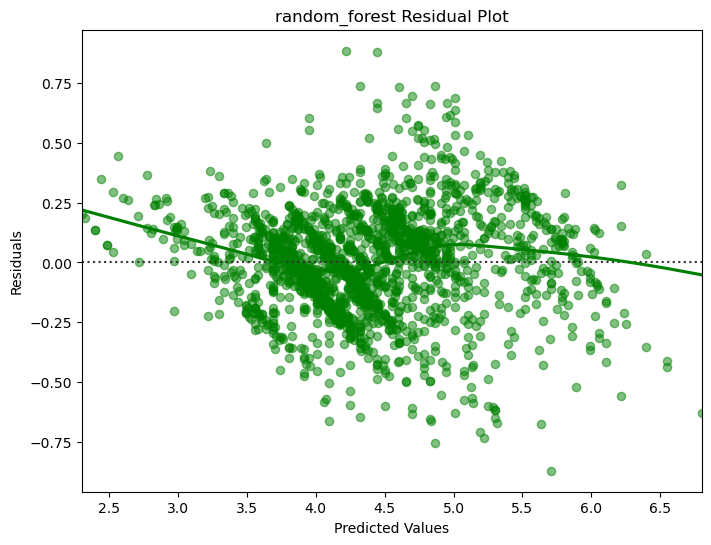

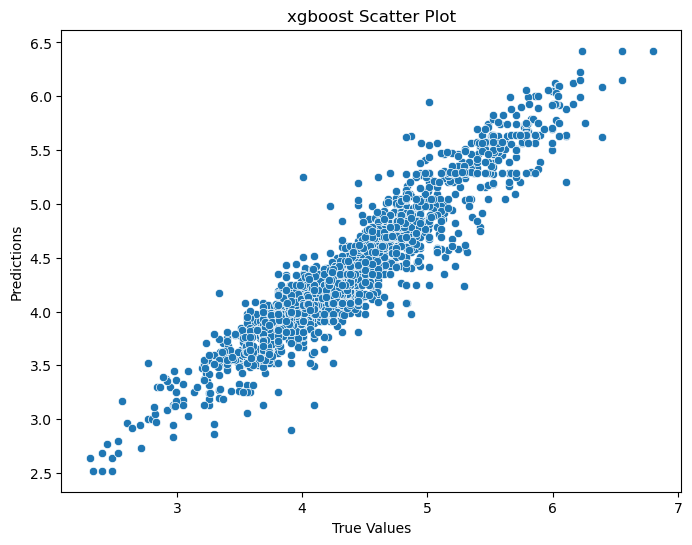

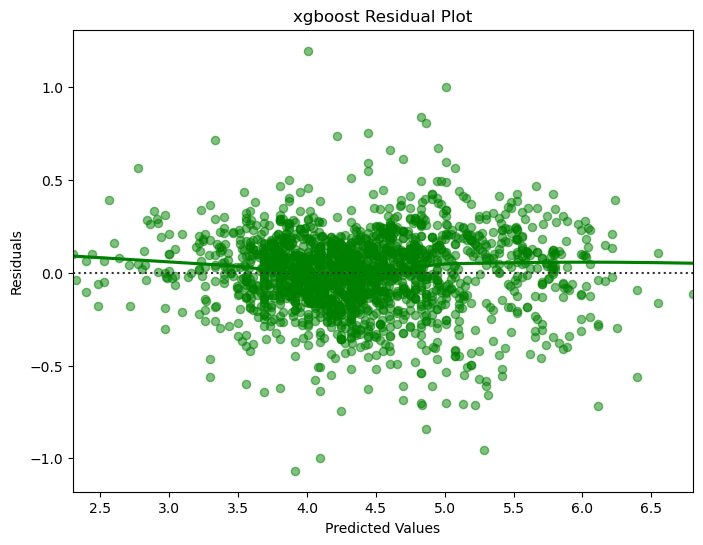

In [103]:
# define a function to create scatter plots
def scatter_plot(Y_test, Y_pred, title):
    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(x=Y_test, y=Y_pred)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predictions')
    ax.set_title(title)
    plt.show()

# define a function to create residual plots
def residual_plot(Y_test, Y_pred, title):
    plt.figure(figsize=(8, 6))
    ax = sns.residplot(x=Y_test, y=Y_pred, lowess=True,color="g",scatter_kws={'s': 35, 'alpha': 0.5})
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title(title)
    plt.show()

# get the best models using RandomizedSearchCV
best_models = find_best_model_using_randomsearchcv(X, Y)

# loop through the best models and generate scatter and residual plots
for _, row in best_models.iterrows():
    model_name = row['model']
    best_params = row['best_params']
    
    if model_name == 'random_forest':
        model = RandomForestRegressor(**best_params)
    elif model_name == 'xgboost':
        model = XGBRegressor(**best_params)
    
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    scatter_plot(Y_test, Y_pred, f"{model_name} Scatter Plot")
    residual_plot(Y_test, Y_pred, f"{model_name} Residual Plot")
